# Information Visualization - Final Project

### Loading Data

In [20]:
import os
import sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

from shapely.geometry import Point
import geopandas as gpd
from geopandas import datasets
from geopandas import GeoDataFrame

plt.style.use('ggplot')
sns.set_style('whitegrid')

file = "san_fran.csv"

df = pd.read_csv(file, low_memory=False)

df.head(10)

,X,Y,Incident Code,Category,Date,Time,PdDistrict,Resolution,Address
0,-122.436220,37.724377,26030,ARSON,2011-02-18,05:27,INGLESIDE,NONE,0 Block of SANJUAN AV
1,-122.410541,37.770913,4134,ASSAULT,2010-11-21,17:00,SOUTHERN,NONE,400 Block of 10TH ST
2,-122.470366,37.745158,4134,ASSAULT,2013-04-02,15:50,TARAVAL,NONE,14TH AV / SANTIAGO ST
3,-122.403405,37.775421,4134,ASSAULT,2017-08-06,18:15,SOUTHERN,NONE,800 Block of BRYANT ST
4,-122.463545,37.707968,7020,VEHICLE THEFT,2016-03-03,19:30,TARAVAL,NONE,100 Block of BEPLER ST
5,-122.406832,37.796903,6244,LARCENY/THEFT,2012-12-21,19:15,CENTRAL,NONE,PACIFIC AV / GRANT AV
6,-122.410460,37.798371,65016,OTHER OFFENSES,2010-02-13,02:55,BAYVIEW,"ARREST, CITED",POWELL ST / VALLEJO ST
7,-122.408711,37.780971,65016,OTHER OFFENSES,2010-01-11,03:38,SOUTHERN,"ARREST, BOOKED",6TH ST / MISSION ST
8,-122.427363,37.794345,27195,TRESPASS,2012-08-17,20:30,NORTHERN,NONE,1900 Block of PACIFIC AV
9,-122.406521,37.785063,6362,LARCENY/THEFT,2010-02-23,17:57,SOUTHERN,"ARREST, CITED",800 Block of MARKET ST


### Number of Crimes per District

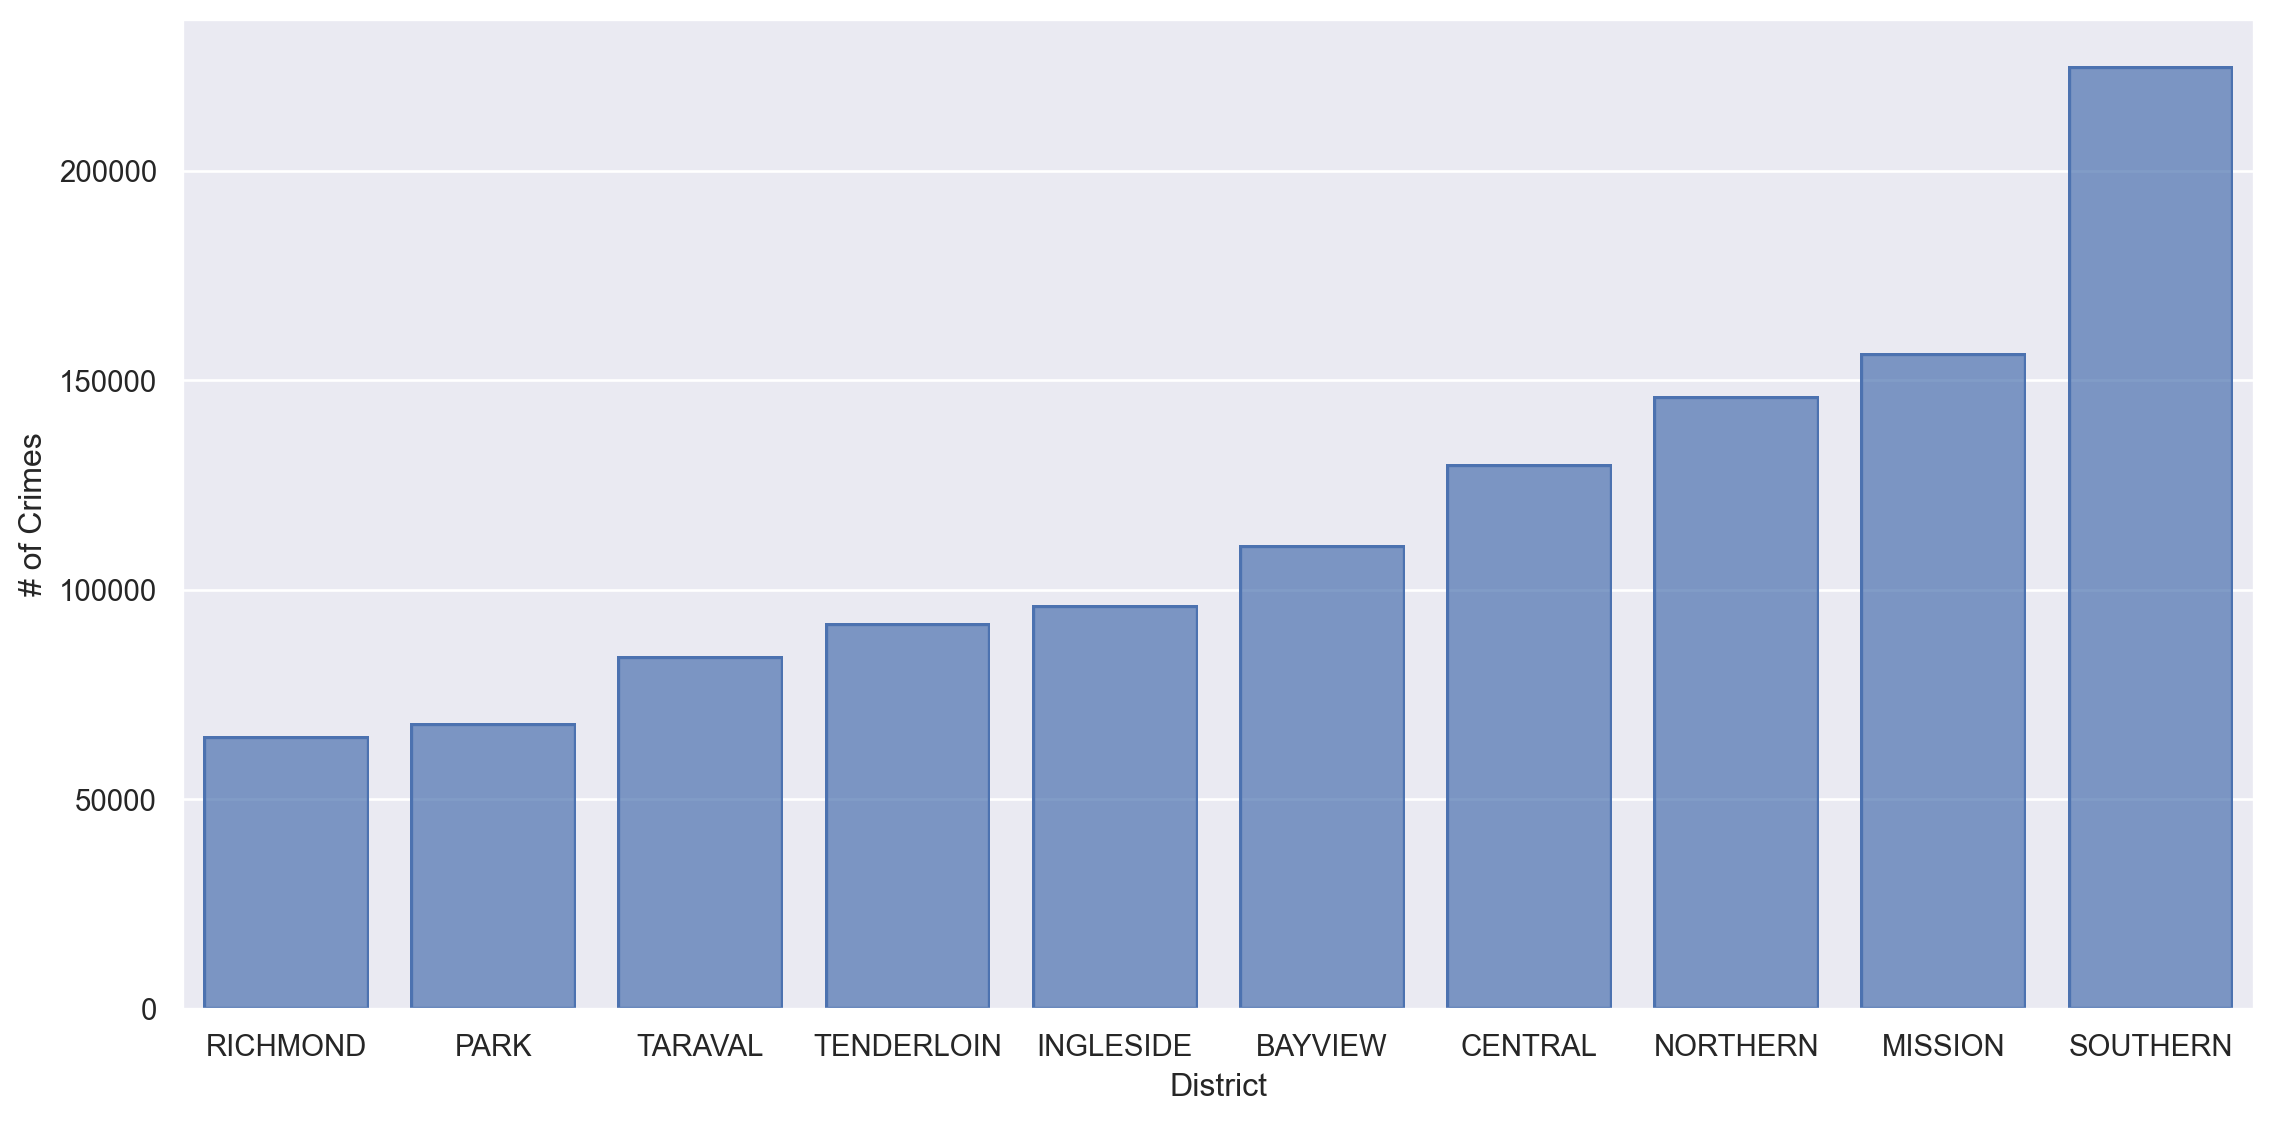

In [21]:
d_counts = df.value_counts("PdDistrict").sort_values(ascending=True)
so.Plot(x=d_counts.index, y=d_counts.values).add(so.Bar(width=0.8)).layout(size=(12, 6)).label(x="District", y="# of Crimes")

<AxesSubplot: title={'center': 'San Francisco Crime Reports'}>

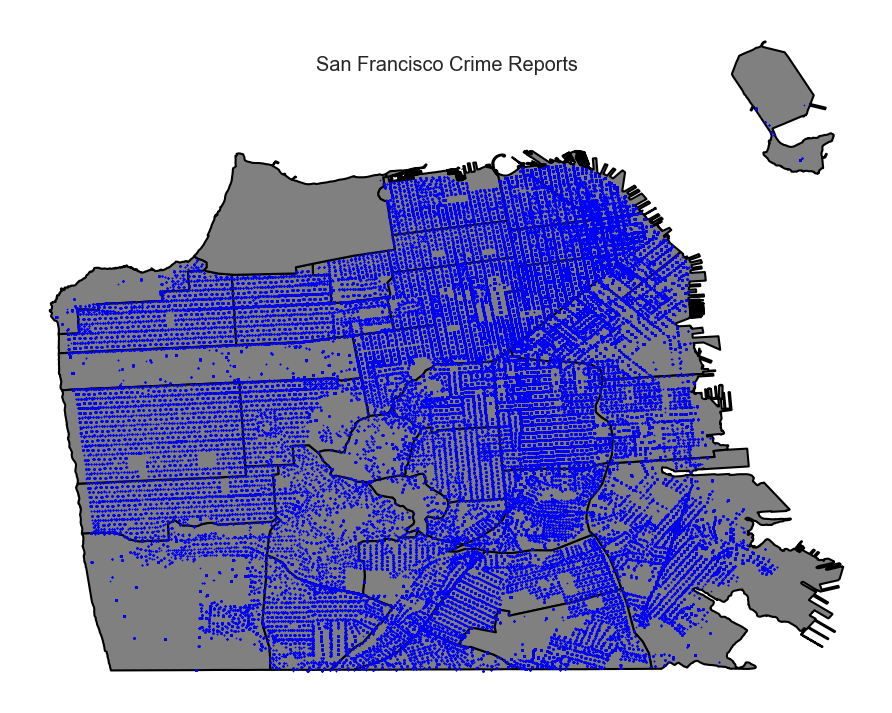

In [22]:
fig, ax = plt.subplots(1, figsize=(15, 9))
plt.title('San Francisco Crime Reports', y=0.9)
ax.set_axis_off()

data = gpd.read_file("san-francisco.geojson")
data.plot(ax=ax, edgecolor='k', facecolor="Gray", alpha=1, linewidth=1.5) #, cmap="cividis")

geometry = [Point(xy) for xy in zip(df['X'], df['Y'])]
gdf = GeoDataFrame(geometry=geometry)

gdf.plot(ax=ax, color='blue', markersize=0.5)

### Top 10 Crimes in San Francisco

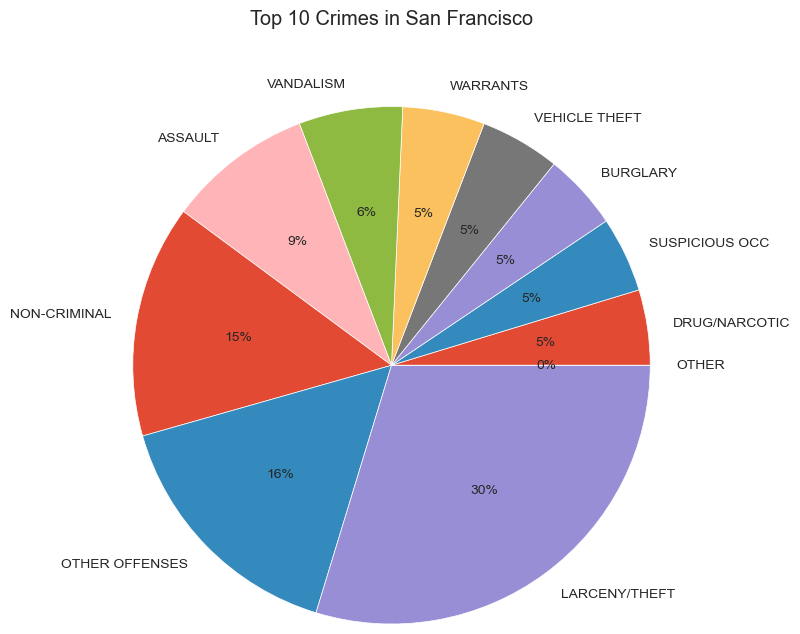

In [27]:
counts = df.value_counts("Category").head(10).sort_values(ascending=True)

top_10 = counts.head(10)

top_10['OTHER'] = counts.tail(counts.size - 10).values.sum()

fig, ax = plt.subplots(1)
plt.title('Top 10 Crimes in San Francisco', y=1.4)
plt.pie(top_10.values, labels=top_10.index, autopct='%.0f%%', radius=1.75)
plt.show()

### # of Top 10 Crimes per District

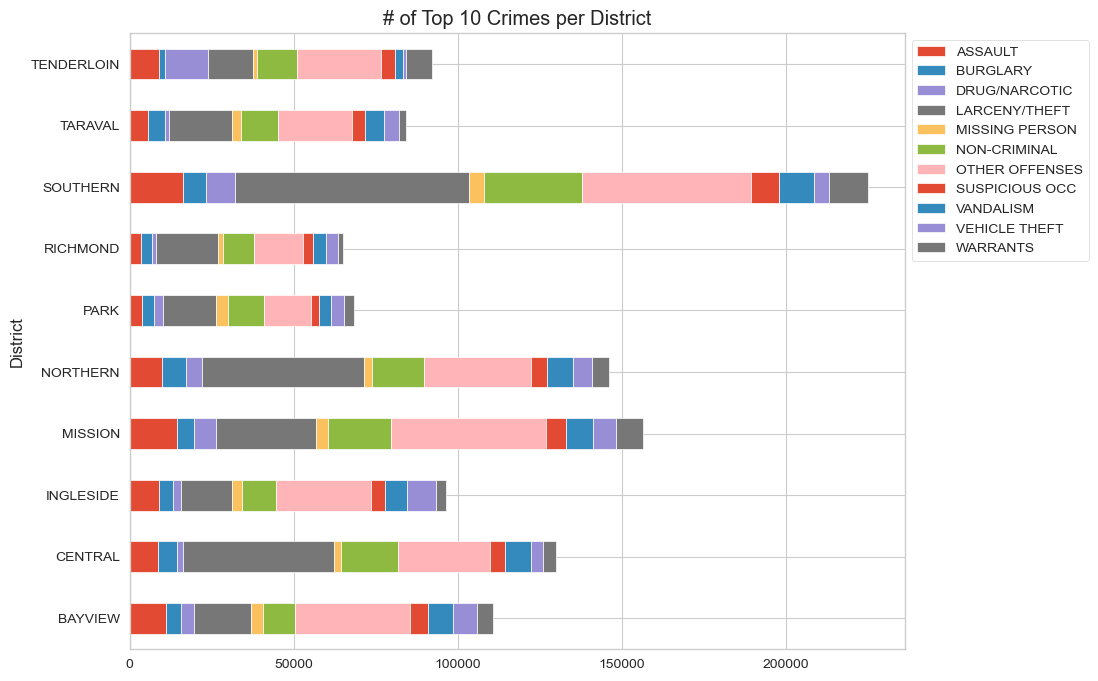

In [ ]:
df2 = df.replace(['ROBBERY', 'FRAUD', 'SECONDARY CODES',
                  'WEAPON LAWS', 'TRESPASS', 'STOLEN PROPERTY',
                  'FORGERY/COUNTERFEITING', 'PROSTITUTION',
                  'SEX OFFENSES, FORCIBLE', 'RECOVERED VEHICLE',
                  'DRUNKENNESS', 'DISORDERLY CONDUCT',
                  'DRIVING UNDER THE INFLUENCE', 'KIDNAPPING',
                  'ARSON', 'EMBEZZLEMENT', 'LIQUOR LAWS', 'LOITERING',
                  'SUICIDE', 'BRIBERY', 'EXTORTION', 'BAD CHECKS', 'GAMBLING',
                  'PORNOGRAPHY/OBSCENE MAT', 'SEX OFFENSES, NON FORCIBLE', 'TREA'],
                  'OTHER OFFENSES')

d_proportions = (df2.groupby(['PdDistrict'])['Category'].apply(lambda x: x.value_counts(normalize=False)).unstack().fillna(0))
d_proportions.plot(kind="barh", stacked=True, figsize=(10, 8), ylabel="District")

plt.title("# of Top 10 Crimes per District")
plt.legend(bbox_to_anchor=[1,1],loc='upper left')
plt.show()

### Proportion of Resolved and Unresolved Crimes per Category


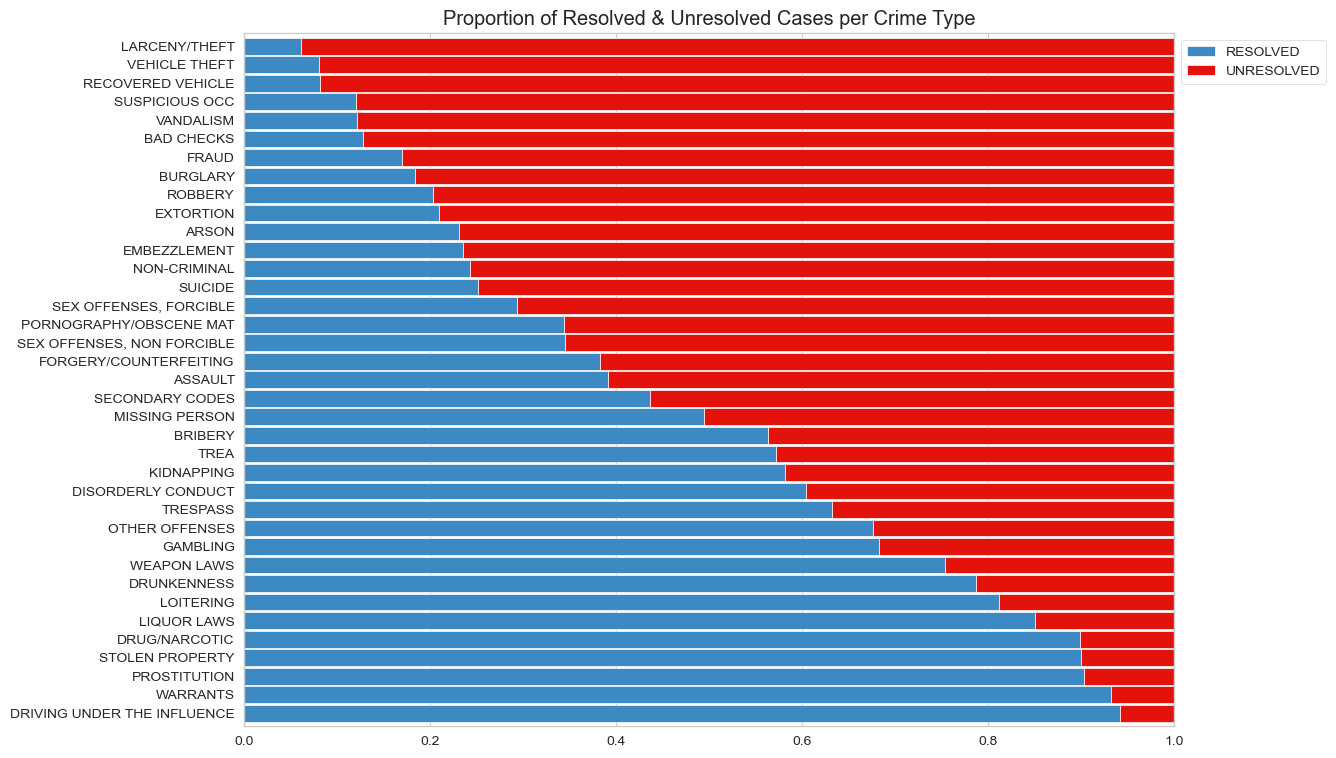

In [ ]:
df2 = df.replace([  'ARREST, BOOKED',
                    'ARREST, CITED',
                    'PSYCHOPATHIC CASE',
                    'LOCATED',
                    'UNFOUNDED',
                    'COMPLAINANT REFUSES TO PROSECUTE',
                    'EXCEPTIONAL CLEARANCE',
                    'DISTRICT ATTORNEY REFUSES TO PROSECUTE',
                    'PROSECUTED BY OUTSIDE AGENCY',
                    'NOT PROSECUTED',
                    'PROSECUTED FOR LESSER OFFENSE'],
                    'RESOLVED')

df2 = df2.replace(['NONE'], 'UNRESOLVED')

df2['Resolution'].value_counts()

proportions = (df2.groupby(['Category'])['Resolution'].apply(lambda x: x.value_counts(normalize=True)).unstack().fillna(0)).sort_values('RESOLVED', ascending=False)

proportions.plot(kind="barh", stacked=True, figsize=(12, 9), color=['#3D89C3','#E3120B'], width=0.9)

plt.xlim(right=1)

plt.ylabel('')
plt.title("Proportion of Resolved & Unresolved Cases per Crime Type")
plt.legend(bbox_to_anchor=[1,1],loc='upper left')
plt.show()

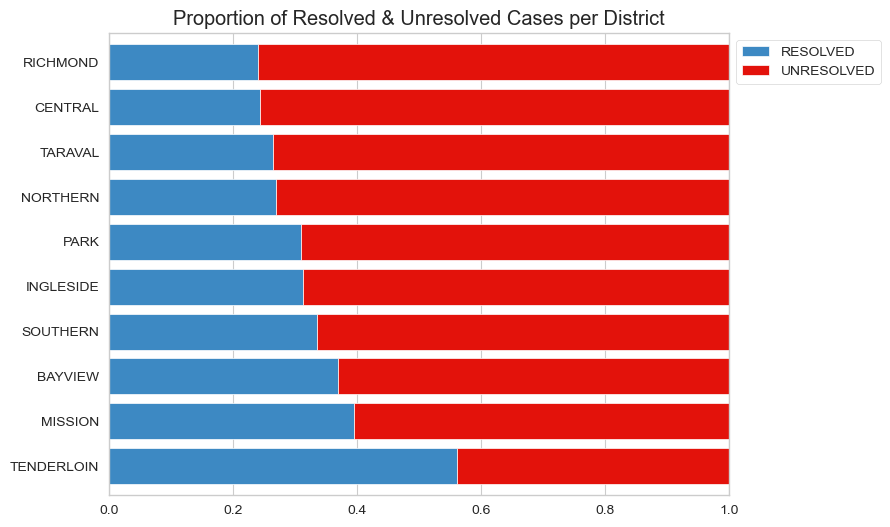

In [ ]:

proportions = (df2.groupby(['PdDistrict'])['Resolution'].apply(lambda x: x.value_counts(normalize=True)).unstack().fillna(0)).sort_values('RESOLVED', ascending=False)
proportions.plot(kind="barh", stacked=True, figsize=(8, 6), color=['#3D89C3','#E3120B'], width=0.8)

plt.xlim(right=1)

plt.ylabel('')
plt.title("Proportion of Resolved & Unresolved Cases per District")
plt.legend(bbox_to_anchor=[1,1],loc='upper left')
plt.show()

In [45]:
district_cat_df = (df2
       .groupby(['PdDistrict', 'Category'])['X']
       .count()
       .reset_index()
       .rename({'X': 'Count'}, axis=1)
      )

,PdDistrict,Category,Resolution,Count
0,BAYVIEW,ARSON,RESOLVED,33
1,BAYVIEW,ARSON,UNRESOLVED,445
2,BAYVIEW,ASSAULT,RESOLVED,4300
3,BAYVIEW,ASSAULT,UNRESOLVED,6762
4,BAYVIEW,BAD CHECKS,RESOLVED,1
...,...,...,...,...
708,TENDERLOIN,VEHICLE THEFT,UNRESOLVED,772
709,TENDERLOIN,WARRANTS,RESOLVED,7490
710,TENDERLOIN,WARRANTS,UNRESOLVED,418
711,TENDERLOIN,WEAPON LAWS,RESOLVED,959


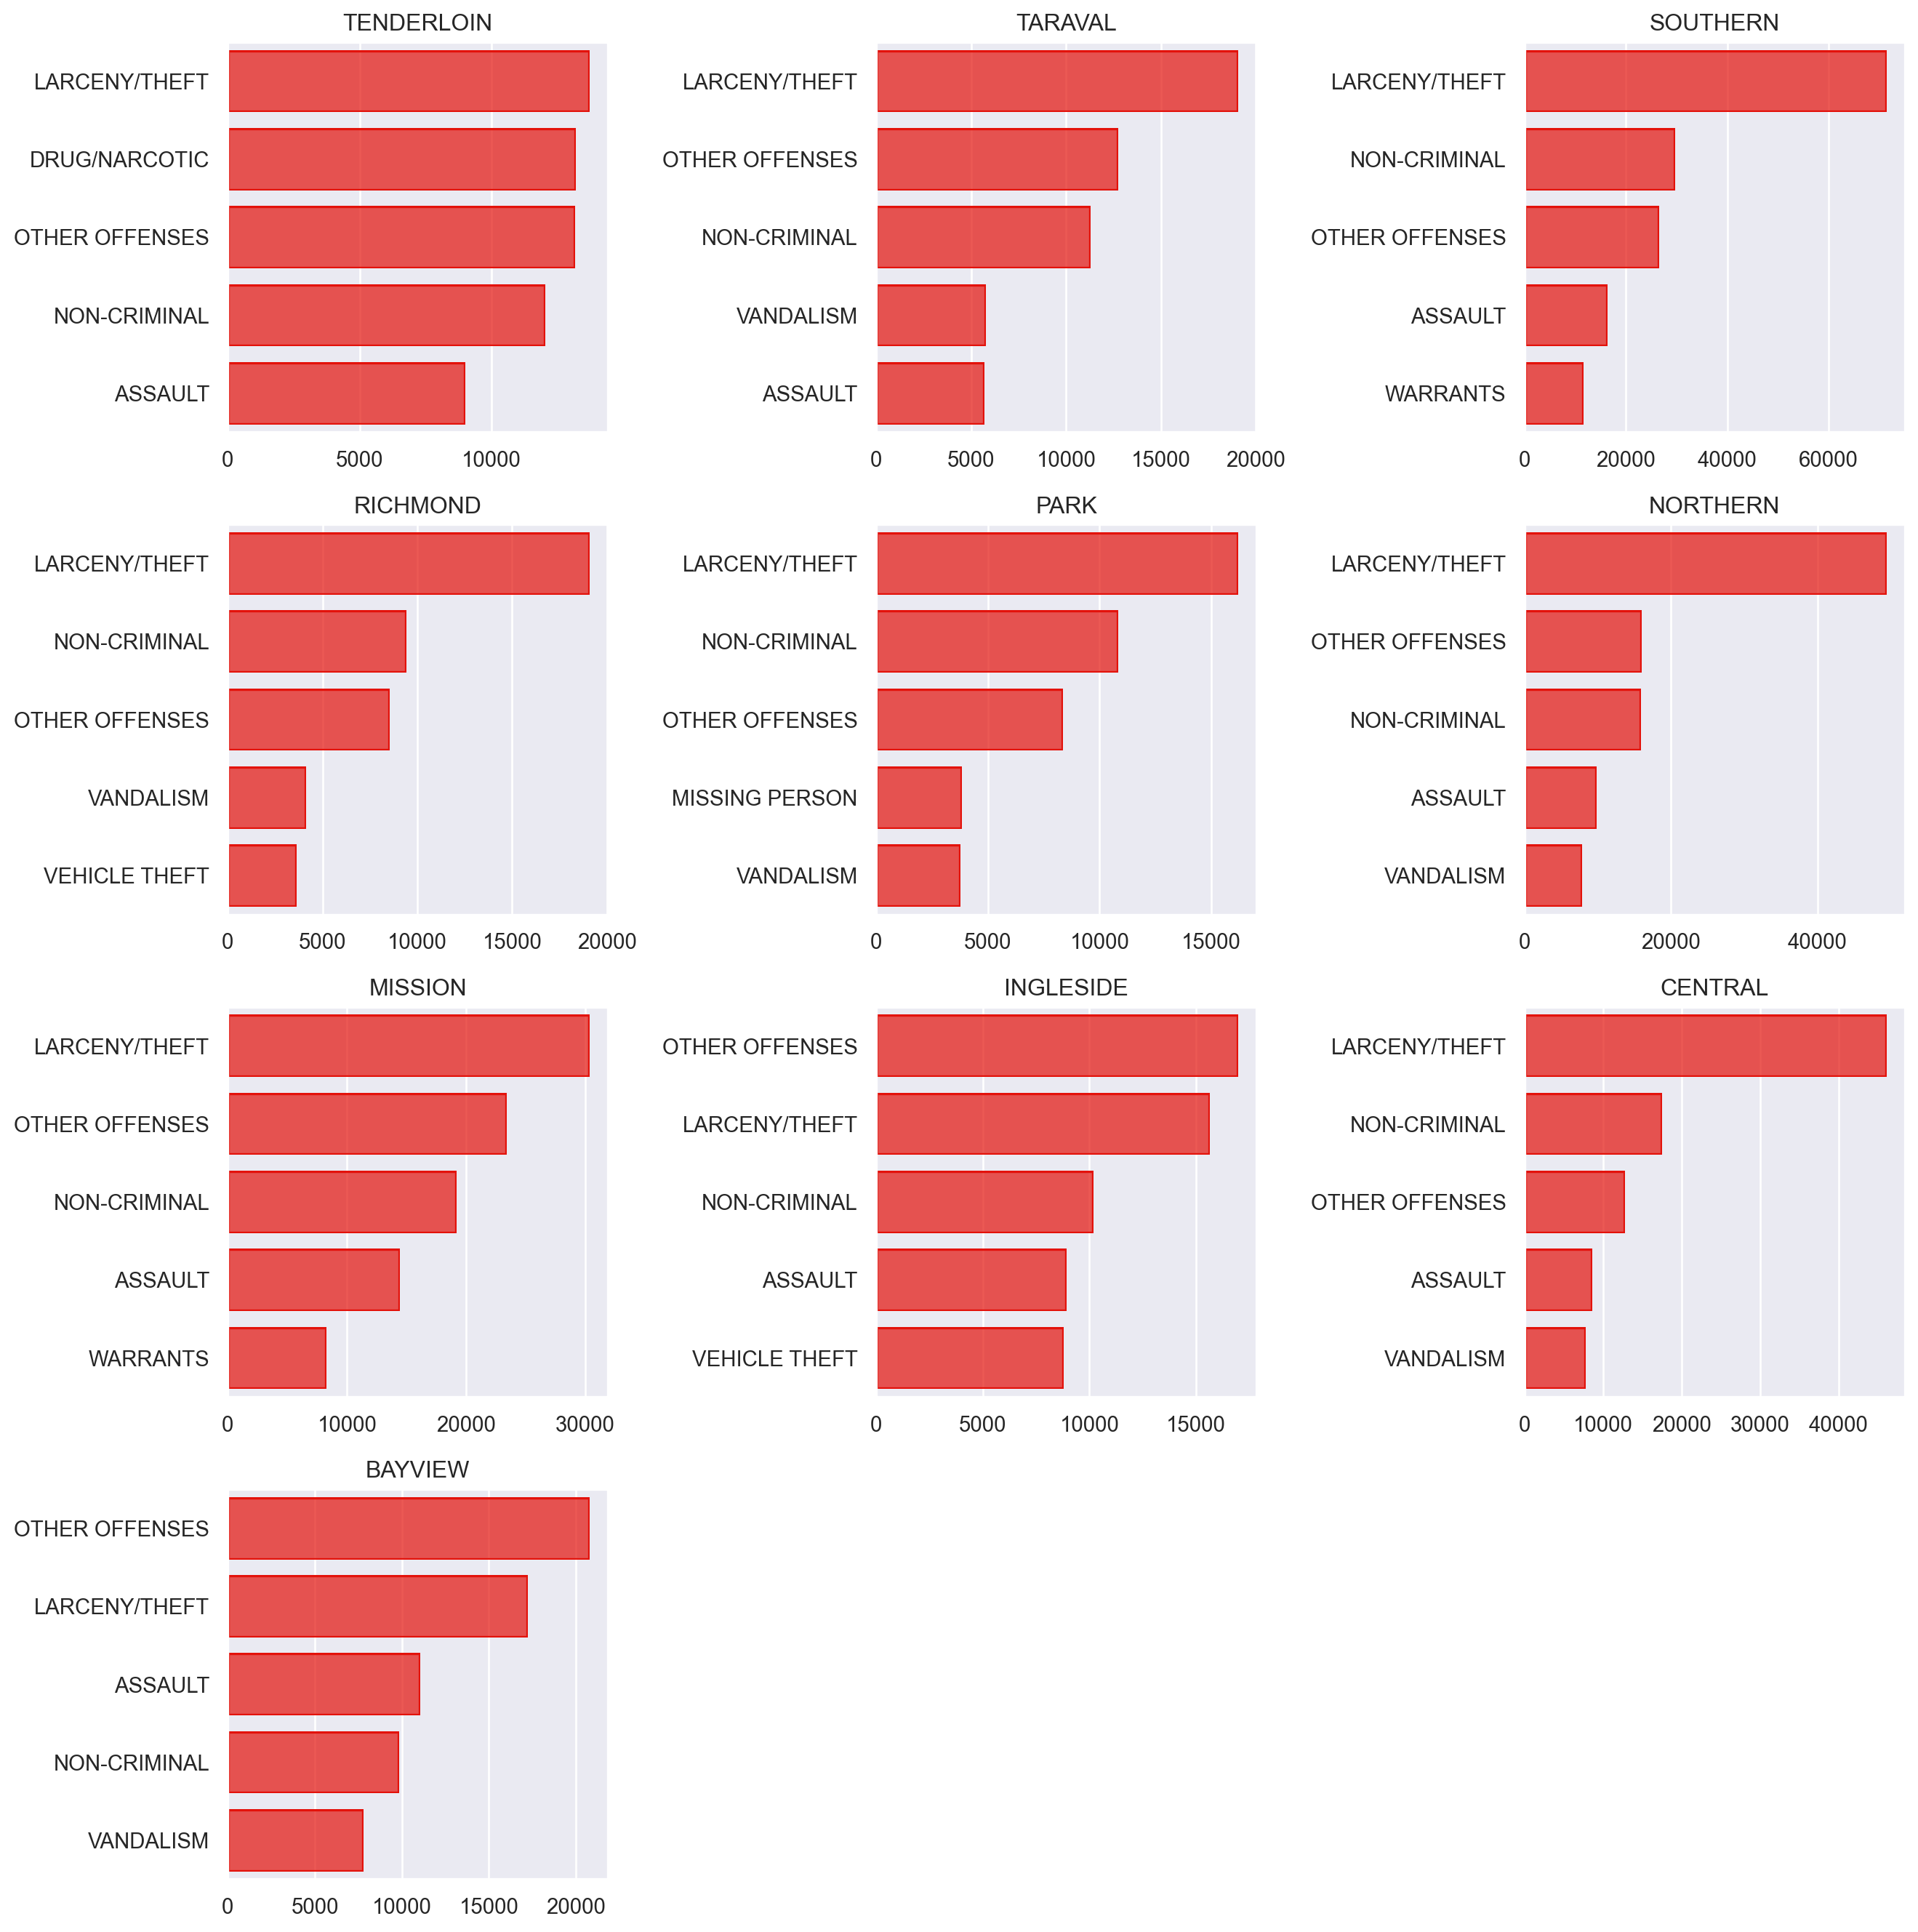

In [68]:
test = district_cat_df.sort_values(by= ['PdDistrict', 'Count'], ascending=False)
test = test.groupby('PdDistrict').head(5)

(
    so.Plot(data=test, y='Category', x='Count')
    .facet('PdDistrict', wrap=3)
    .share(x=False, y=False)
    .add(so.Bar(color='#E3120B'))
    .layout(size=(14, 14))
    .label(x="", y="")
)

In [67]:
# TODO CEWER WIP
district_cat_result_df = (df2
       .groupby(['PdDistrict', 'Category', 'Resolution'])['X']
       .count()
       .reset_index()
       .rename({'X': 'Count'}, axis=1)
      )

test = district_cat_result_df.sort_values(by= ['PdDistrict', 'Count'], ascending=False)
test = test.groupby('PdDistrict').head(5)
test

# proportions = (df2.groupby(['PdDistrict', 'Category'])['Resolution'].apply(lambda x: x.value_counts(normalize=True)).unstack().fillna(0)).sort_values('UNRESOLVED', ascending=False)
# proportions.head(25)

# (
#     so.Plot(data=test, y='Category', x='Count')
#     .facet('PdDistrict', wrap=3)
#     .share(x=False, y=False)
#     .add(so.Bar(color='#E3120B'), so.Stack())
#     .layout(size=(14, 14))
#     .label(x="", y="")
# )

,PdDistrict,Category,Resolution,Count
657,TENDERLOIN,DRUG/NARCOTIC,RESOLVED,12133
683,TENDERLOIN,OTHER OFFENSES,RESOLVED,11098
674,TENDERLOIN,LARCENY/THEFT,UNRESOLVED,10410
682,TENDERLOIN,NON-CRIMINAL,UNRESOLVED,7970
709,TENDERLOIN,WARRANTS,RESOLVED,7490
601,TARAVAL,LARCENY/THEFT,UNRESOLVED,17747
609,TARAVAL,NON-CRIMINAL,UNRESOLVED,8645
611,TARAVAL,OTHER OFFENSES,UNRESOLVED,6390
610,TARAVAL,OTHER OFFENSES,RESOLVED,6346
636,TARAVAL,VANDALISM,UNRESOLVED,5255
